# Name- Manisha Chouhan 
## Task1- Prediction Using Supervised Machine Learning

## In this task I've used Linear Regression Algorithm from the given dataset which has two feature of students, Hours and Scores

### Importing required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#a look at given dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Exploration

<AxesSubplot:>

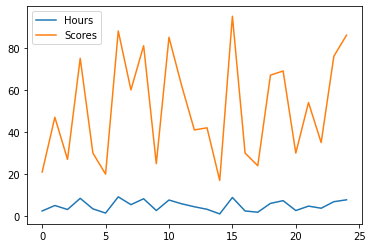

In [4]:
#plot to get rough idea about the data
df.plot()

In [5]:
#to get basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#check missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

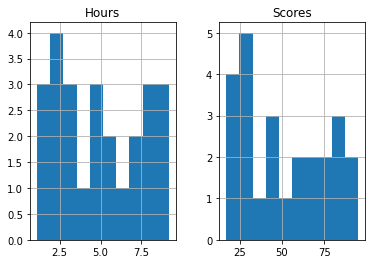

In [8]:
#ploting each of these features
df.hist(column=['Hours','Scores'])

<AxesSubplot:>

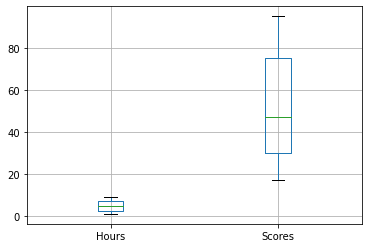

In [9]:
df.boxplot(column=['Hours','Scores'])

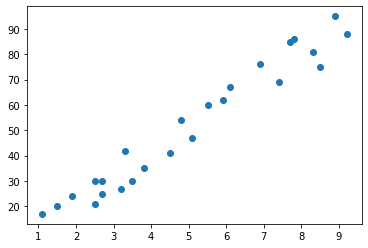

In [10]:
plt.scatter(x='Hours',y='Scores', data=df)
plt.show()

### Train Test Split

In [11]:
x=df.drop(columns=['Scores'])
y=df['Scores']

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

### Linear Regression 

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [14]:
#coefficients 
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [9.77580339]
Intercept: 2.483673405373196


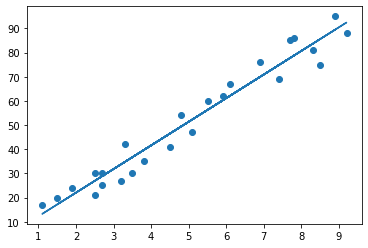

In [15]:
line= model.coef_*x+ model.intercept_
plt.scatter(x,y)
plt.plot(x,line)

In [16]:
ypred=model.predict(xtest)

In [17]:
#comparing actual and predicted 
df=pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
df

,Actual,Predicted
5,20,17.147378
2,27,33.766244
19,69,74.824618
16,30,26.923182
11,62,60.160913


In [18]:
Trained_model=model.score(xtrain,ytrain)
Trained_model

0.9512837351709387

In [19]:
Tested_model=model.score(xtest,ytest)
Tested_model

0.9491748734859171

In [20]:
#predicted score of student studied for 9.25 hrs/day
hr_day=[[9.25]]
predicted_score=model.predict(hr_day)
print('Predicted score of student studied for 9.25 hrs/day is:',predicted_score)

Predicted score of student studied for 9.25 hrs/day is: [92.90985477]


In [21]:
#Statistical analysis 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error is:' ,mean_absolute_error(ytest,ypred))
print('Mean Squared Error is:' ,mean_squared_error(ytest,ypred))
print('r2 score is:' ,r2_score(ytest,ypred))

Mean Absolute Error is: 4.071877793635608
Mean Squared Error is: 20.1389481299402
r2 score is: 0.9491748734859171


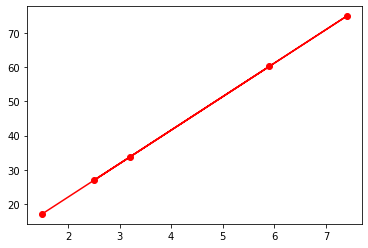

In [22]:
plt.plot(xtest,ypred,color='r', marker='o')

## Conclusion: Able to predict the score of the percentage of marks that students are expected to score based upon the number of hrs/day they studied.